In [5]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import csv

# First name: Maciej (6)
# Last name: Wojtyś (6)

# Excercise 1 - Divergence problem

In [38]:
stan_file = r'C:\Studia\Data-Analytics\Lab-3\stan1.stan'
model1 = CmdStanModel(stan_file=stan_file)
model2 = CmdStanModel(stan_file=stan_file)

data1 = {
    "N": 1,
    "y": [3]
}

data2 = {
    "N": 5,
    "y": [-1, -0.5, 0, 0.5, 1]
}

result1 = model1.sample(data = data1, seed = 2137, chains = 4)
result2 = model2.sample(data = data2, seed = 2137, chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [9]:
print(result1.diagnose())
print(result2.diagnose())

Processing csv files: C:\Users\Maciej\AppData\Local\Temp\tmpo9w1nbu7\stan1-20220322011658_1.csv, C:\Users\Maciej\AppData\Local\Temp\tmpo9w1nbu7\stan1-20220322011658_2.csv, C:\Users\Maciej\AppData\Local\Temp\tmpo9w1nbu7\stan1-20220322011658_3.csv, C:\Users\Maciej\AppData\Local\Temp\tmpo9w1nbu7\stan1-20220322011658_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
37 of 4000 (0.93%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.

Processing csv files: C:\Users\Maciej\AppData\Local\Temp\tmpo9w1nbu7\stan1-202203220

In [10]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result1
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result
#Arviz plot

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

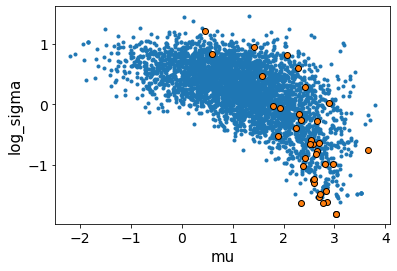

In [11]:
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

In [12]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result2
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

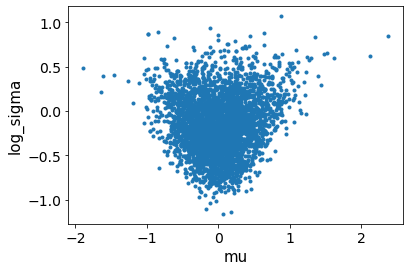

In [13]:
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

# Excercise 2 - Binominial example

In [50]:
with open('coin.csv', newline='') as f:
    reader = csv.reader(f)
    N = 0
    y = []
    # print(n = len(reader))
    for row in reader:
        if N != 0:
            y.append(row[1])
        N += 1
N -= 1
y = list(map(int, y))

In [51]:
stan_file = r'C:\Studia\Data-Analytics\Lab-3\stan2.stan'
model3 = CmdStanModel(stan_file=stan_file)

data3 = {
    "N": N,
    "y": y
}
result3 = model3.sample(data = data3)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [53]:
result3.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01700,0.700,-290.00,-290.00,-290.0,1700.0,7100.0,1.0
theta,0.46,0.00062,0.024,0.42,0.46,0.5,1500.0,6600.0,1.0


In [54]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result3
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

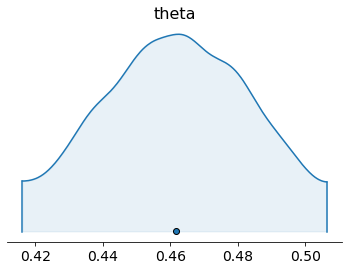

In [55]:
#Plot
az.plot_density(arviz_result,shade=0.1)

# Excercise 3 - Predictive checks

In [6]:
with open('normal.csv', newline='') as f:
    reader = csv.reader(f)
    N = 0
    y = []
    # print(n = len(reader))
    for row in reader:
        if N != 0:
            y.append(row[1])
        N += 1
N -= 1
y = list(map(float, y))

### Posterior predictive

In [7]:
stan_file1 = r'C:\Studia\Data-Analytics\Lab-3\stan3.stan'
stan_file2 = r'C:\Studia\Data-Analytics\Lab-3\stan4.stan'

model4 = CmdStanModel(stan_file=stan_file1)
model5 = CmdStanModel(stan_file=stan_file2)

data4 = {
    "N": N,
    "y": y
}
data5 = {
    "N": 100
}


result4 = model4.sample(data = data4)
result5 = model5.sample(data = data5)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status





chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      
chain 3 |██████████| 00:00 Sampling completed                      
chain 4 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [8]:
result4.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0240,1.000,-55.00,-53.000,-52.00,1800.0,1600.0,1.0
mu,-0.0330,0.0019,0.100,-0.20,-0.033,0.14,2800.0,2600.0,1.0
sigma,1.0000,0.0014,0.074,0.92,1.000,1.20,2700.0,2500.0,1.0
y_rep[1],-0.0490,0.0170,1.000,-1.70,-0.039,1.70,3796.0,3528.0,1.0
y_rep[2],-0.0160,0.0170,1.100,-1.70,-0.041,1.70,3888.0,3614.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0620,0.0170,1.000,-1.70,-0.079,1.60,3889.0,3614.0,1.0
y_rep[97],-0.0450,0.0170,1.000,-1.70,-0.046,1.60,3745.0,3480.0,1.0
y_rep[98],0.0071,0.0160,1.000,-1.70,0.019,1.70,4025.0,3741.0,1.0


In [9]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result4,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

C:\Users\Maciej\miniconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


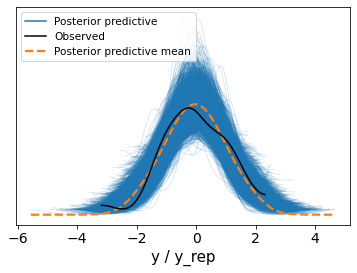

In [10]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

### Prior predictive

In [11]:
result5.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00000,NaN,0.00,0.000,0.00000,0.0,NaN,NaN,NaN
mu,-0.00110,0.0160,1.00,-1.700,-0.00590,1.6,4100.0,4900.0,1.0
sigma,0.81000,0.0097,0.61,0.062,0.69000,2.0,4000.0,4700.0,1.0
y_prior[1],-0.00048,0.0230,1.40,-2.300,-0.00086,2.2,3890.0,4637.0,1.0
y_prior[2],-0.01500,0.0220,1.40,-2.300,-0.00660,2.2,4159.0,4957.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],0.01300,0.0230,1.40,-2.200,-0.00290,2.2,3966.0,4728.0,1.0
y_prior[97],-0.00650,0.0220,1.40,-2.300,0.00900,2.3,4079.0,4861.0,1.0
y_prior[98],0.00200,0.0220,1.40,-2.200,-0.00280,2.2,3995.0,4761.0,1.0


In [12]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result5,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

<AxesSubplot:xlabel='y / y_prior'>

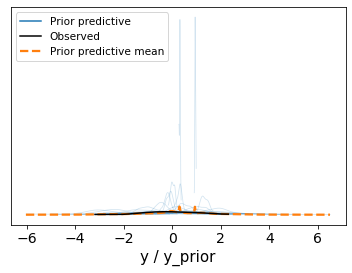

In [13]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

In [16]:
df = result5.draws_pd()
df

,lp__,accept_stat__,mu,sigma,y_prior[1],y_prior[2],y_prior[3],y_prior[4],y_prior[5],y_prior[6],...,y_prior[91],y_prior[92],y_prior[93],y_prior[94],y_prior[95],y_prior[96],y_prior[97],y_prior[98],y_prior[99],y_prior[100]
0,0.0,0.0,0.780801,0.506560,0.623181,0.060733,0.997748,0.386536,0.699035,0.140195,...,1.451830,1.313530,0.732619,0.624475,1.588030,0.306032,0.618476,1.052780,0.995652,0.761849
1,0.0,0.0,0.044475,0.605496,-0.471790,0.571978,-0.520178,0.187802,0.291711,-0.106379,...,-0.233878,1.029120,-0.431943,0.937897,-0.380750,0.501916,-0.847278,1.480150,-0.094220,-1.735200
2,0.0,0.0,-0.922381,0.663711,0.289520,0.109028,-0.928203,-0.989700,-0.104770,-0.895648,...,-1.701200,-2.038070,-0.424227,0.388065,-0.795023,-1.113200,-1.386430,-1.101970,0.640888,-0.399107
3,0.0,0.0,0.839249,0.323519,1.175980,1.424480,0.698933,0.750081,0.393662,1.054560,...,1.298950,0.952873,1.138460,0.599912,0.497634,0.330808,0.116173,0.884452,0.493179,0.580387
4,0.0,0.0,-1.970010,1.212230,-1.822650,-1.212980,-3.559840,-2.072050,-0.569529,-1.137420,...,0.454407,-0.989013,-1.033910,-2.357770,-2.873600,-3.279780,-0.857281,-3.103080,-1.680470,-2.495890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,-0.643573,1.016740,-3.358300,-2.459990,-1.222040,-1.781180,2.233580,0.377990,...,-0.269333,0.417943,-0.613681,-1.304520,-1.034420,-0.175709,-0.757109,-0.648725,-1.857040,-0.825354
3996,0.0,0.0,-1.825540,0.596963,-1.547020,-1.191240,-0.670478,-2.780590,-1.690680,-1.532140,...,-0.497230,-2.041720,-2.982600,-2.430160,-1.930690,-1.466390,-2.131610,-1.719280,-2.294450,-1.705160
3997,0.0,0.0,-1.573020,0.870168,-0.893963,-2.186250,-1.573990,-1.261860,-1.713280,-1.248180,...,-1.329420,-2.293210,-1.419850,-1.495400,-2.935210,-1.230780,-1.010040,-2.561350,-1.860780,-2.670740
3998,0.0,0.0,1.495610,2.047340,3.658830,1.043570,0.903399,0.374254,1.187760,1.042200,...,2.623180,-4.316440,-3.115510,-1.028820,1.348830,0.812813,2.630160,2.931210,2.174330,-1.063800


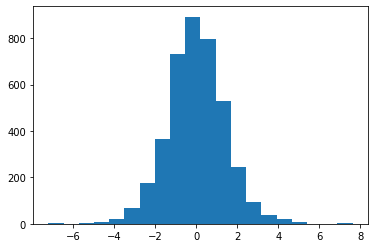

In [23]:
plt.hist(df.iloc[:, 4], bins = 20)
plt.show()